# **Binary brest cancer classification using neural networks**
This machine learning model should can effectively distinguishes between **malignant** and **benign** breast cancer cases. <br>By utilizing the provided dataset containing attributes associated with breast cancer, the neural network learns to identify complex patterns that differentiate between this two classes. <br>The objective is to train the model to accurately predict whether a given instance of data represents malignant or benign cancer. Achieving high accuracy in this classification task is crucial for improving early detection and diagnosis accuracy in breast cancer cases, contributing to more effective medicamental treatments and/or surgical/radiologic interventions. 

In [9]:
# Importing libraries and uploading data from CSV file

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('cancer.csv')

In [10]:
# Data revision 

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis(1=m, 0=b)      569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Looking for if any cells without data are present 

dataset.isna().sum()

diagnosis(1=m, 0=b)        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
# Overview of all columns - input attributes 

dataset.columns

Index(['diagnosis(1=m, 0=b)', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
# Selecting only relevant input attributes - diagnosis(1=m, 0=b) and all "mean" attributes 

dataset = dataset.loc[:, "diagnosis(1=m, 0=b)": "fractal_dimension_mean"]

# Checking the selection

dataset.columns

Index(['diagnosis(1=m, 0=b)', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

**Diagnosis 1 means the tumor is malignant, diagnosis 0 means the tumor is benign.**

In [14]:
# Separates attributes from the target variable
# The column "diagnosis(1=m, 0=b)" is separated from the dataset
# x value stores the remaining columns of the dataset

x = dataset.drop(columns=["diagnosis(1=m, 0=b)"])

In [15]:
# y value stores the target variable "diagnosis(1=m, 0=b)"

y = dataset["diagnosis(1=m, 0=b)"]

In [16]:
# Splitting data into training and testing sets (80 % for training, 20 % for testing)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# Model definiton - creating a sequential model using TensorFlow

model = tf.keras.models.Sequential()

In [18]:
# Adding 3 layers to the model (two input, one output) with a sigmoid activation function.

model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [19]:
# Model compilation with 'adam' optimizer (adaptive opimization algorithm) - it measures performance using the accuracy metric

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Model training on the training data for 1000 epochs

model.fit(x_train, y_train, epochs=1000)

In [21]:
# Model evaluation on testing data and outputs the loss and accuracy

loss_all_data, accuracy_all_data = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9211


In [27]:
print(f"Loss_all_data = {loss_all_data:.4f} \nAccuracy_all_data: {accuracy_all_data:.4f}")

Loss_all_data = 0.2183 
Accuracy_all_data: 0.9211


### Now let's try how the values ​​of loss and accuracy will change the model if does not work with all available attributes, but only with selected columns.<br><br>I selected the input attributes radius mean, smoothness mean and concavity mean. 

In [ ]:
columns = ["radius_mean", "smoothness_mean", "concavity_mean", "symmetry_mean"]
results = []

for col_name in columns:
    # Obtaining the dates from the actual column
    x = dataset[[col_name]]
    x_train = np.array(x_train)
    x_test = np.array(x_test)

    # Model preparation for the actual column
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(256, input_shape=(x_train.shape[1],), activation='sigmoid'))
    model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Model training for the actual column
    model.fit(x_train, y_train, epochs=1000)

    # Model evaluation for the actual column
    loss, accuracy = model.evaluate(x_test, y_test)

    # Storing of results
    results.append((col_name, loss, accuracy))

In [28]:
# Printing results for all selected columns

for col_name, loss, accuracy in results:
    print("***" * 10)
    print(f"Loss_{col_name} = {loss:.4f} \nAccuracy_{col_name}: {accuracy:.4f}")

******************************
Loss_radius_mean = 0.1657 
Accuracy_radius_mean: 0.9386
******************************
Loss_smoothness_mean = 0.1564 
Accuracy_smoothness_mean: 0.9211
******************************
Loss_concavity_mean = 0.2154 
Accuracy_concavity_mean: 0.9211
******************************
Loss_symmetry_mean = 0.1612 
Accuracy_symmetry_mean: 0.9298


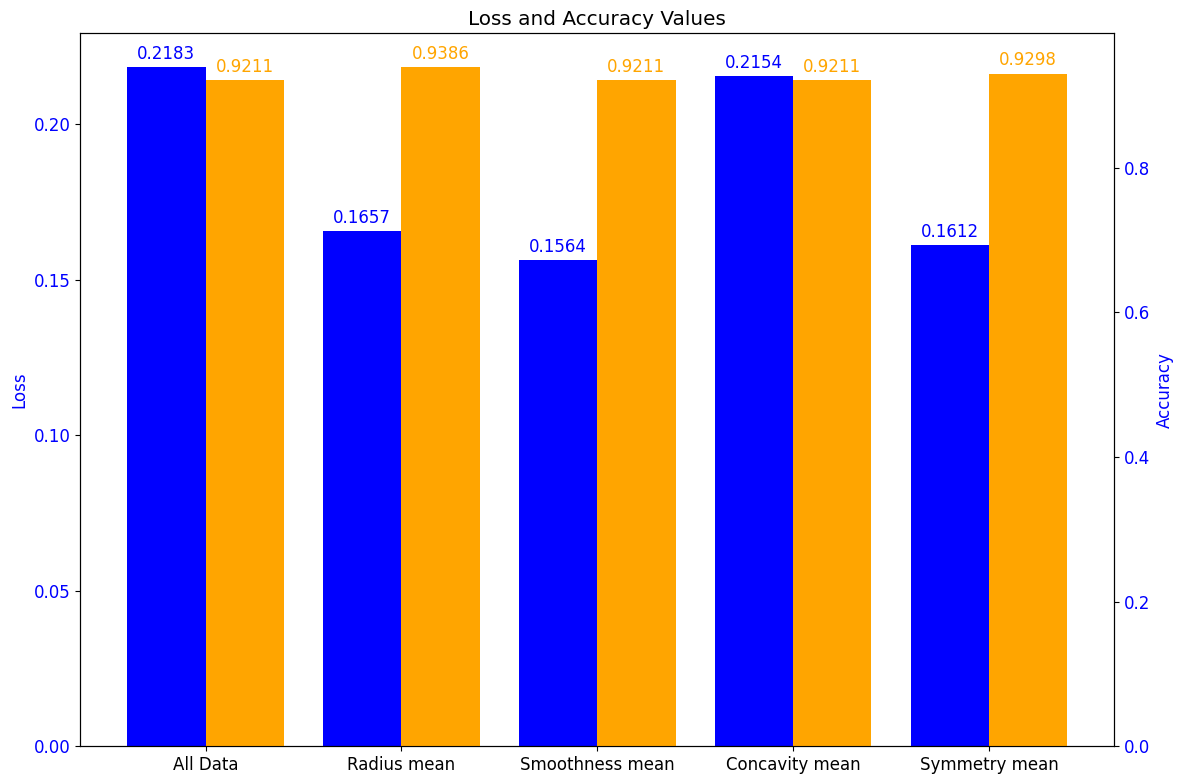

All Data loss = 0.2183 
All Data accuracy = 0.9211
Radius mean loss = 0.1657 
Radius mean accuracy 0.9386
Smoothness mean loss  = 0.1564 
Smoothness mean accuracy = 0.9211
Concavity mean loss = 0.2154 
Concavity mean accuracy = 0.9211
Symmetry mean loss = 0.1612 
Symmetry mean accuracy = 0.9298


In [29]:
# Visualisation of the results

plt.rcParams.update({'font.size': 12})

# Preparing results from the 3 selected columns for visualisation
loss_values = []
accuracy_values = []

loss_radius_mean = None
accuracy_radius_mean = None
loss_smoothness_mean = None
accuracy_smoothness_mean = None
loss_concavity_mean = None
accuracy_concavity_mean = None
loss_symmetry_mean = None
accuracy_symmetry_mean = None

for col_name, loss, accuracy in results:
    loss_values.append(loss)
    accuracy_values.append(accuracy)

    if col_name == "radius_mean":
        loss_radius_mean = loss
        accuracy_radius_mean = accuracy
    elif col_name == "smoothness_mean":
        loss_smoothness_mean = loss
        accuracy_smoothness_mean = accuracy
    elif col_name == "concavity_mean":
        loss_concavity_mean = loss
        accuracy_concavity_mean = accuracy
    elif col_name == "symmetry_mean":
        loss_symmetry_mean = loss
        accuracy_symmetry_mean = accuracy

# Adding values for "All Data"
loss_values.insert(0, loss_all_data)
accuracy_values.insert(0, accuracy_all_data)

# Graph creation
categories = ["All Data", "Radius mean", "Smoothness mean", "Concavity mean", "Symmetry mean"]
fig, ax1 = plt.subplots(figsize=(12, 8))

bars1 = ax1.bar(np.arange(len(categories)) - 0.2, loss_values, width=0.4, align='center', label='Loss', color='blue')

ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

bars2 = ax2.bar(np.arange(len(categories)) + 0.2, accuracy_values, width=0.4, align='center', label='Accuracy', color='orange')

ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.annotate(f'{height1:.4f}', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='blue')
    ax2.annotate(f'{height2:.4f}', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='orange')

ax1.set_xticks(np.arange(len(categories)))
ax1.set_xticklabels(categories)
ax1.set_title('Loss and Accuracy Values')

plt.tight_layout()
plt.show()

# Recapitulaion of results
print(f"All Data loss = {loss_all_data:.4f} \nAll Data accuracy = {accuracy_all_data:.4f}")
print(f"Radius mean loss = {loss_radius_mean:.4f} \nRadius mean accuracy {accuracy_radius_mean:.4f}")
print(f"Smoothness mean loss  = {loss_smoothness_mean:.4f} \nSmoothness mean accuracy = {accuracy_smoothness_mean:.4f}")
print(f"Concavity mean loss = {loss_concavity_mean:.4f} \nConcavity mean accuracy = {accuracy_concavity_mean:.4f}")
print(f"Symmetry mean loss = {loss_symmetry_mean:.4f} \nSymmetry mean accuracy = {accuracy_symmetry_mean:.4f}")
